# Pymaceuticals Inc.
---

### Analysis

- I'll draw three conclusions from the data below but many more could be made:
- With the 4 most promising drugs, only Infubinol had outliers and that was a single one. I'd recommend looking at that data point to determine why it was such an outlier.
- With a correlation coefficient of 0.84, in the case of Capomulin, there are promising results that the treatment does indeed reduce tumor volume over time.
- That being said, a line graph of a single mouse on the treatment of Capomulin (days vs tumor volume) did show a spike in tumor volume toward the end of the trial data. This should be monitored to see if its just a blip or if the treatment does become less effective after about 35 days. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_merged = pd.merge(study_results, mouse_metadata, how='left')
# Display the data table for preview
study_data_merged


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
len(study_data_merged["Mouse ID"].unique())


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = study_data_merged[study_data_merged.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_mouse["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_merged[study_data_merged["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = study_data_merged[study_data_merged["Mouse ID"] != "g989"]
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = clean_mouse_data.groupby(by="Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_median = clean_mouse_data.groupby(by="Drug Regimen").median()["Tumor Volume (mm3)"]
drug_variance = clean_mouse_data.groupby(by="Drug Regimen").var()["Tumor Volume (mm3)"]
drug_std_dev = clean_mouse_data.groupby(by="Drug Regimen").std()["Tumor Volume (mm3)"]
drug_sem = drug_variance = clean_mouse_data.groupby(by="Drug Regimen").sem()["Tumor Volume (mm3)"]

tumor_summary_df = pd.DataFrame(
    {
        "Mean Tumor Volume": drug_mean,
        "Median Tumor Volume": drug_median,
        "Tumor Volume Variance": drug_variance,
        "Tumor Volume Std. Dev.": drug_std_dev,
        "Tumor Volume Std. Err": drug_sem      
    }
)
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,4.994774,0.329346
Ceftamin,52.591172,51.776157,0.469821,6.268188,0.469821
Infubinol,52.884795,51.820584,0.492236,6.567243,0.492236
Ketapril,55.235638,53.698743,0.603860,8.279709,0.603860
Naftisol,54.331565,52.509285,0.596466,8.134708,0.596466
Placebo,54.033581,52.288934,0.581331,7.821003,0.581331
Propriva,52.320930,50.446266,0.544332,6.622085,0.544332
Ramicane,40.216745,40.673236,0.320955,4.846308,0.320955
Stelasyn,54.233149,52.431737,0.573111,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_mouse_data.groupby(by="Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Test'>

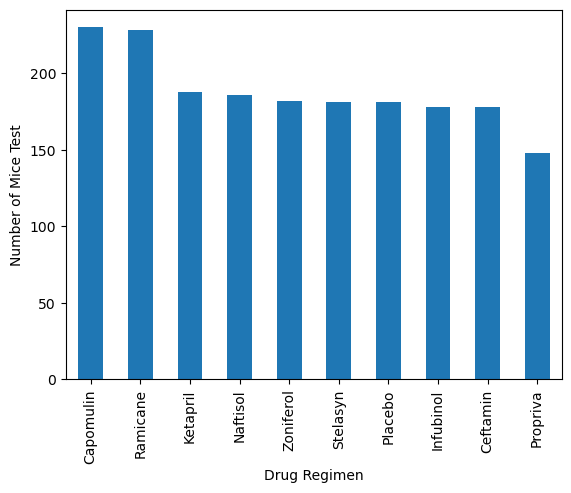

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = pd.DataFrame(clean_mouse_data["Drug Regimen"].value_counts())
counts.plot.bar(xlabel = "Drug Regimen", ylabel= "Number of Mice Test", legend = False)



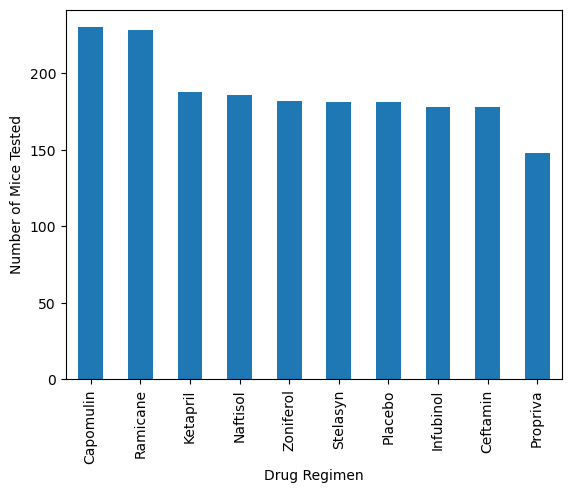

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_mouse_data["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


<AxesSubplot:ylabel='Sex'>

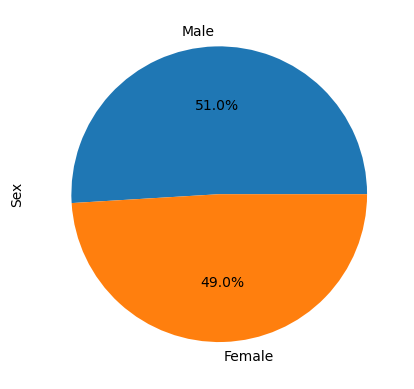

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = pd.DataFrame(clean_mouse_data["Sex"].value_counts())
gender_count.plot.pie(y="Sex", legend=False, autopct='%1.1f%%')


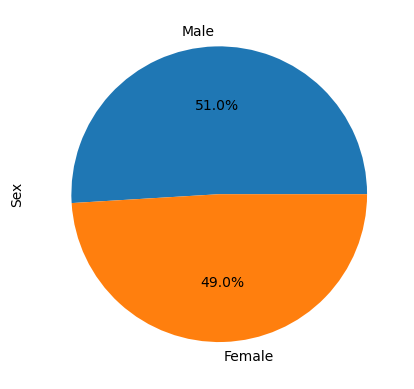

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = clean_mouse_data.Sex.value_counts()
gender_count
plt.pie(gender_count.values, labels=gender_count.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(clean_mouse_data.groupby(["Mouse ID"])["Timepoint"].max())
last_timepoint = last_timepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_stats_merge = last_timepoint.merge(clean_mouse_data, on=["Mouse ID", "Timepoint"], how="left")
mouse_stats_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = (mouse_stats_merge.loc[mouse_stats_merge["Drug Regimen"]== drug, "Tumor Volume (mm3)"])
    
    # add subset 
    tumor_vol_data.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outlier}")
    

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


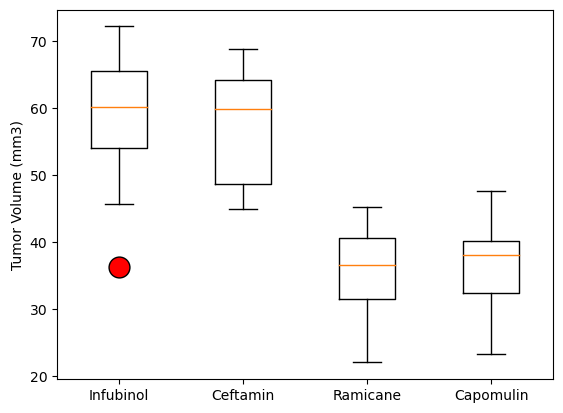

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=15,
                  linestyle='none', markeredgecolor='black')
plt.boxplot(tumor_vol_data, labels = treatments, flierprops=flierprops)
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

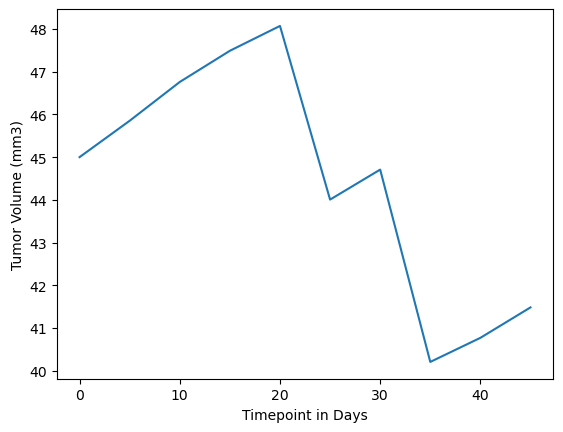

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_only = clean_mouse_data[clean_mouse_data["Drug Regimen"]== "Capomulin"]
capomulin_mouse = capomulin_only[capomulin_only["Mouse ID"] == "l509"]

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

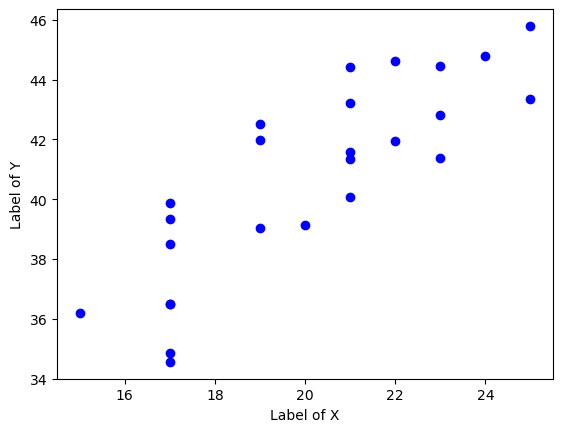

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capomulin_mouse = capomulin_only.groupby(["Mouse ID"]).mean()
avg_capomulin_mouse

x_values = avg_capomulin_mouse["Weight (g)"]
y_values = avg_capomulin_mouse["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values, marker="o", facecolors = "blue")
plt.xlabel("Label of X")
plt.ylabel("Label of Y")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


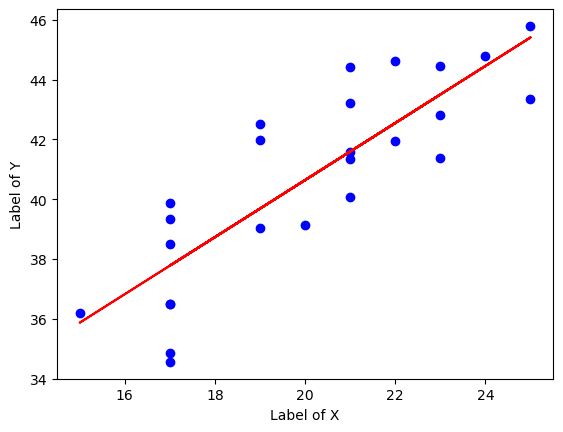

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_capomulin_mouse["Weight (g)"]
y_values = avg_capomulin_mouse["Tumor Volume (mm3)"]


correlation = st.pearsonr(x_values, y_values)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


slope = st.linregress(x_values, y_values)
y_fit = x_values * slope[0] + slope[1]


plt.scatter(x_values, y_values, marker="o", facecolors = "blue")
plt.plot(x_values, y_fit, color="red")
plt.xlabel("Label of X")
plt.ylabel("Label of Y")
plt.show()